In [8]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style()

from wrangle import wrangle_telco

In [2]:
#Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset.
#Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.
train, validate, test = wrangle_telco(split=True)
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
3396-DKDEL,115.15,70,8250.00
8966-KZXXA,25.10,36,930.95
8857-CUPFQ,19.25,63,1237.65
6901-GOGZG,84.95,60,4984.85
8606-OEGQZ,25.30,18,454.65


array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

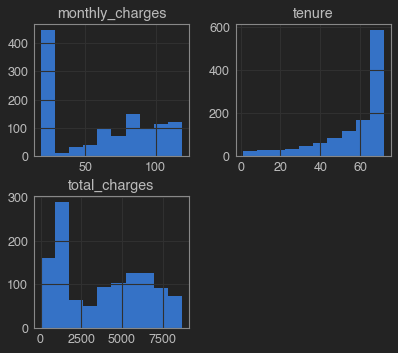

In [10]:
#1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can.
train.hist()

## Min-Max scaler

In [11]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [12]:
scaler.fit(train)

MinMaxScaler()

In [13]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [14]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [15]:
train_scaled.head()

,monthly_charges,tenure,total_charges
0,0.964126,0.971831,0.951173
1,0.066766,0.492958,0.105236
2,0.008470,0.873239,0.140684
3,0.663179,0.830986,0.573786
4,0.068759,0.239437,0.050185


<AxesSubplot:>

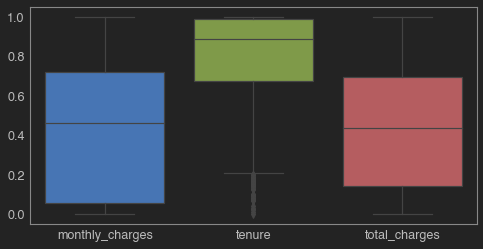

In [17]:
plt.figure(figsize=(8,4))
jtplot.style(grid=False)
sns.boxplot(data=train_scaled)
#everything looks better on the same axes

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

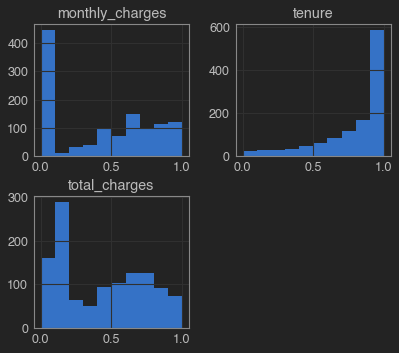

In [18]:
train_scaled.hist()

## Standard scaler

In [19]:
scaler2 = sklearn.preprocessing.StandardScaler()
scaler2.fit(train)

StandardScaler()

In [20]:
train_scaled_std = scaler2.transform(train)
validate_scaled_std = scaler2.transform(validate)
test_scaled_std = scaler2.transform(test)

In [22]:
train_scaled_std = pd.DataFrame(train_scaled_std, columns=train.columns)
validate_scaled_std = pd.DataFrame(validate_scaled_std, columns=train.columns)
test_scaled_std = pd.DataFrame(test_scaled_std, columns=train.columns)

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

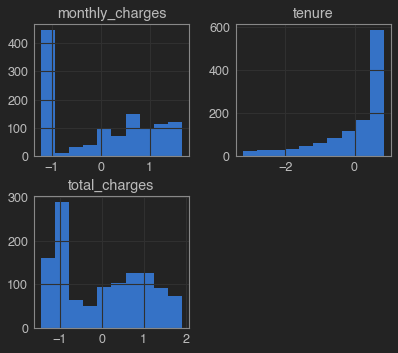

In [23]:
train_scaled_std.hist()

<AxesSubplot:>

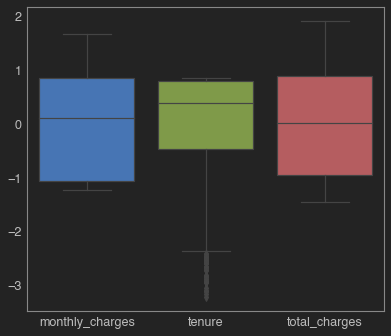

In [24]:
sns.boxplot(data=train_scaled_std)

## Robust scaler

In [25]:
scaler3 = sklearn.preprocessing.RobustScaler()
scaler3.fit(train)

RobustScaler()

In [28]:
train_scaled_rob = scaler3.transform(train)
validate_scaled_rob = scaler3.transform(validate)
test_scaled_rob = scaler3.transform(test)

In [29]:
train_scaled_rob = pd.DataFrame(train_scaled_rob, columns=train.columns)
validate_scaled_rob = pd.DataFrame(validate_scaled_rob, columns=train.columns)
test_scaled_rob = pd.DataFrame(test_scaled_rob, columns=train.columns)

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

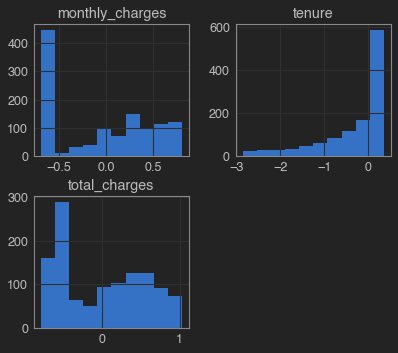

In [30]:
train_scaled_rob.hist()

<AxesSubplot:>

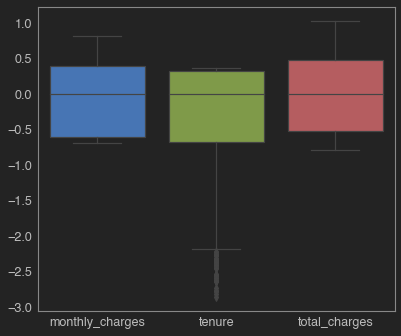

In [31]:
sns.boxplot(data=train_scaled_rob)

In [34]:
#2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
train_unscaled = scaler.inverse_transform(train_scaled)
train_unscaled = pd.DataFrame(train_unscaled, columns=train.columns)
train_unscaled.head()#yes

,monthly_charges,tenure,total_charges
0,115.15,70.0,8250.00
1,25.10,36.0,930.95
2,19.25,63.0,1237.65
3,84.95,60.0,4984.85
4,25.30,18.0,454.65


In [35]:
#3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler 
# to your data. Visualize the result of your data scaling.
scaler4 = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
scaler4.fit(train)

QuantileTransformer(output_distribution='normal')

In [36]:
train_quant = scaler4.transform(train)
train_quant = pd.DataFrame(train_quant, columns=train.columns)

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 576x288 with 0 Axes>

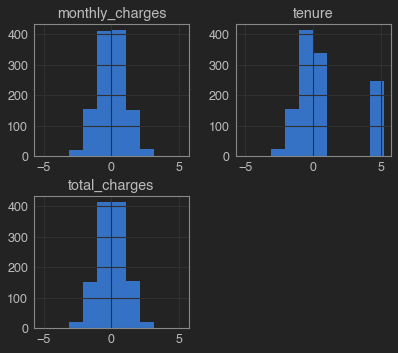

In [41]:
train_quant.hist()

<AxesSubplot:>

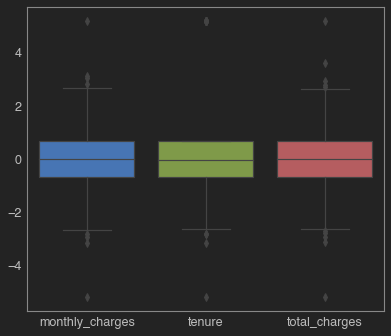

In [44]:
sns.boxplot(data=train_quant)

In [45]:
#4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
scaler5 = sklearn.preprocessing.QuantileTransformer()
scaler5.fit(train)

QuantileTransformer()

In [46]:
train_quant2 = scaler5.transform(train)
train_quant2 = pd.DataFrame(train_quant2, columns=train.columns)

array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'total_charges'}>, <AxesSubplot:>]],
      dtype=object)

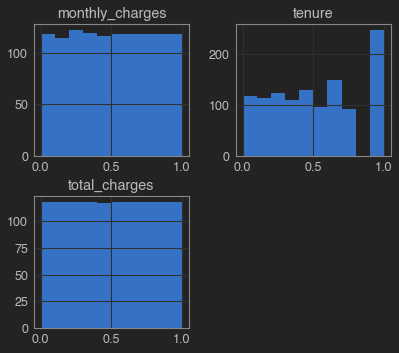

In [47]:
train_quant2.hist()

<AxesSubplot:>

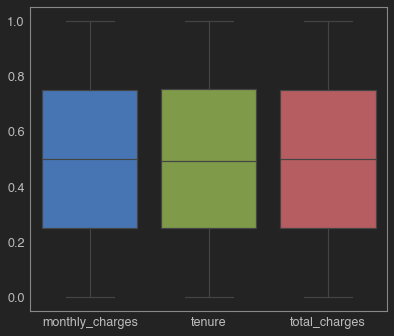

In [48]:
sns.boxplot(data=train_quant2)

In [7]:
#5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py 
# that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. 
# Be sure to only learn the parameters for scaling from your training data!


In [49]:
def scale_data(train,validate,test):
    '''Accepts train, validate, test data frames and applies min-max scaler
    return: train, validate, test scaled pandas dataframe'''
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train)
    
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    
    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
    
    return train_scaled, validate_scaled, test_scaled